<a href="https://colab.research.google.com/github/FREYDER18/PARCIAL-2025-1/blob/main/SOLUCION_PUNTO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**punto 2**

2. Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5 k Hz aplicado a la señal: \begin{equation}
x(t) = 3 \cos\left(1000{\pi}{t}\right) + 5 \sin(2000{\pi}{t}) + 10 \cos(11000{\pi}{t})
\end{equation}Realizar la simulacion del proceso de discretizácion. En caso de que la discretizácion no sea apropiada, diseñe y implemente un conversor adecuado para la señal estudiada.

Desarrollo Punto 2.  

- Codigo punto 2.

- Simulación de la señal muestreada a 5 kHz (con aliasing)
python
Copiar
Editar


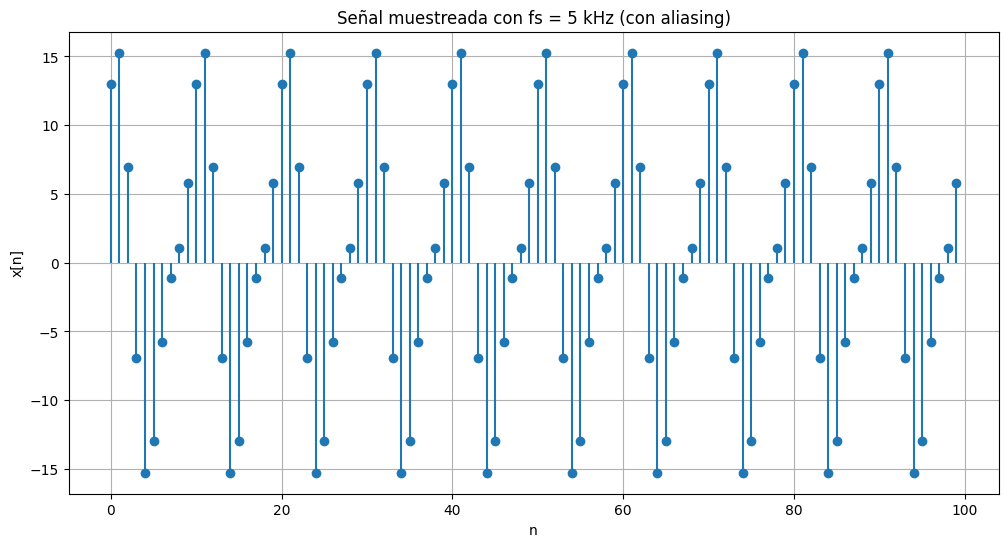

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Frecuencia de muestreo insuficiente (provoca aliasing)
fs = 5000  # Hz
Ts = 1 / fs
n = np.arange(0, 100)
t = n * Ts

# Señal original muestreada
x_n = 3 * np.cos(2 * np.pi * 500 * t) + \
      5 * np.sin(2 * np.pi * 1000 * t) + \
      10 * np.cos(2 * np.pi * 5500 * t)

# Graficar señal discreta (muestreada con aliasing)
plt.figure(figsize=(12, 6))
plt.stem(n, x_n, basefmt=" ")
plt.title("Señal muestreada con fs = 5 kHz (con aliasing)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()


- Diseño de un conversor adecuado: simulación con frecuencia de muestreo suficiente (12 kHz) y señal continua original

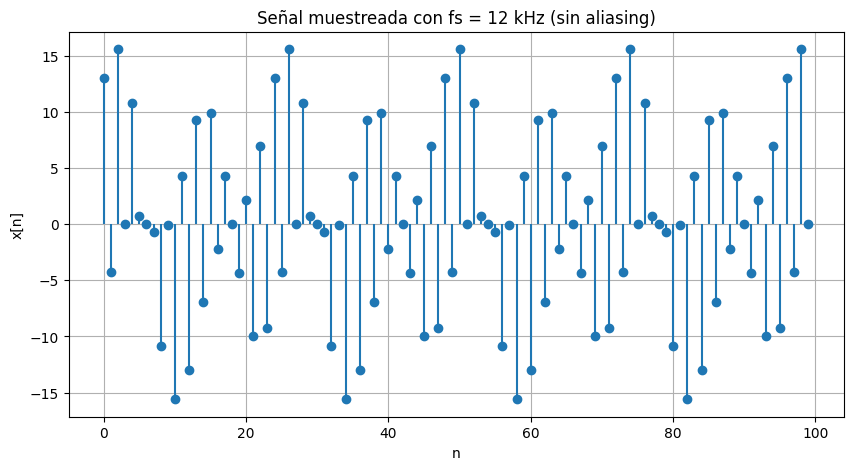

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Muestreo adecuado con fs = 12 kHz (sin aliasing)
fs = 12000  # Hz
Ts = 1 / fs
n = np.arange(0, 100)
t = n * Ts

x_n = 3 * np.cos(2 * np.pi * 500 * t) + \
      5 * np.sin(2 * np.pi * 1000 * t) + \
      10 * np.cos(2 * np.pi * 5500 * t)

plt.figure(figsize=(10, 5))
plt.stem(n, x_n, basefmt=" ")
plt.title("Señal muestreada con fs = 12 kHz (sin aliasing)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.grid(True)
plt.show()


- Comparación señal continua y señal discreta muestreada (superpuestas)



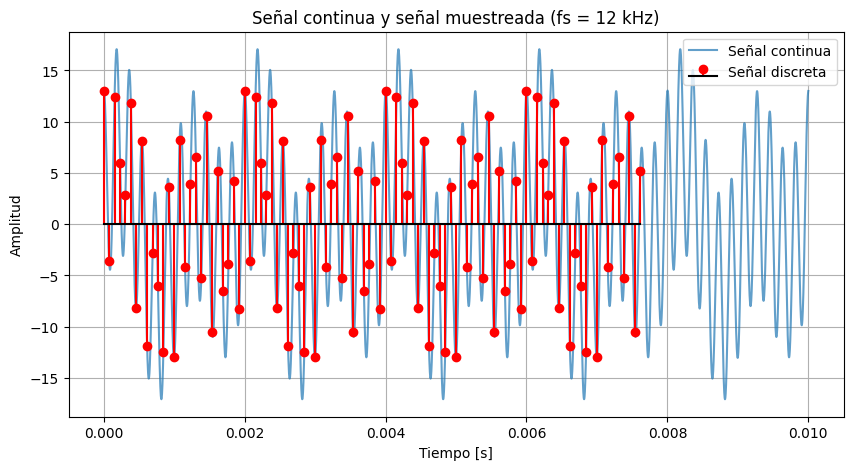

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Señal continua
t_cont = np.linspace(0, 0.01, 10000)
x_cont = 3 * np.cos(2 * np.pi * 500 * t_cont) + \
         5 * np.sin(2 * np.pi * 1000 * t_cont) + \
         10 * np.cos(2 * np.pi * 5500 * t_cont)

# Muestreo adecuado
fs = 13000  # Hz
Ts = 1 / fs
n = np.arange(0, 100)
t_disc = n * Ts

x_disc = 3 * np.cos(2 * np.pi * 500 * t_disc) + \
         5 * np.sin(2 * np.pi * 1000 * t_disc) + \
         10 * np.cos(2 * np.pi * 5500 * t_disc)

plt.figure(figsize=(10, 5))
plt.plot(t_cont, x_cont, label="Señal continua", alpha=0.7)
plt.stem(t_disc, x_disc, linefmt='r-', markerfmt='ro', basefmt='k-', label="Señal discreta")
plt.title("Señal continua y señal muestreada (fs = 12 kHz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()
